In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


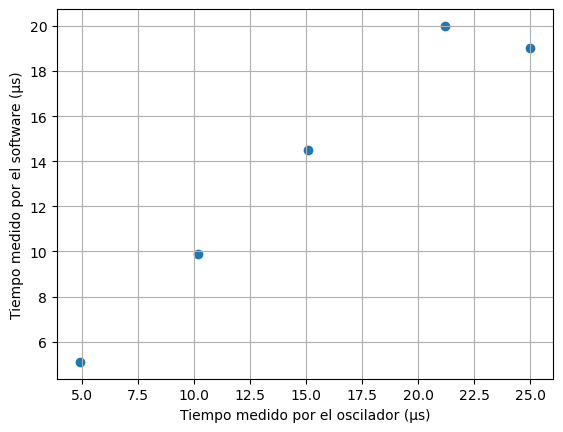

In [2]:
t_detect = [5.1,9.9,14.5,20,19]
t_osc =  [4.9,10.2,15.1,21.2,25]

plt.scatter(t_osc, t_detect)
plt.xlabel("Tiempo medido por el oscilador (μs)")
plt.ylabel("Tiempo medido por el software (μs)")
plt.grid(which = "major")

In [3]:
def expfunction(x,A,B,C):
    return A*np.exp(-x*B)+C

def expfunction2(x,A,B):
    return A*np.exp(-x*B)

def linearfunction(x,A,B):
    return A*x + B

In [4]:
DataFrame1 = pd.read_csv('24-10-15-11-21.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame1 = DataFrame1[DataFrame1['time_rawdata'] < 20000]

DataFrame2 = pd.read_csv('24-10-18-17-18.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame2 = DataFrame2[DataFrame2['time_rawdata'] < 20000]


In [5]:
times_rawdata1 = DataFrame1['time_rawdata']/1000
times_rawdata2 = DataFrame2['time_rawdata']/1000

In [6]:
len(times_rawdata1), len(times_rawdata2)

(2066, 9225)

In [7]:
bins = 80

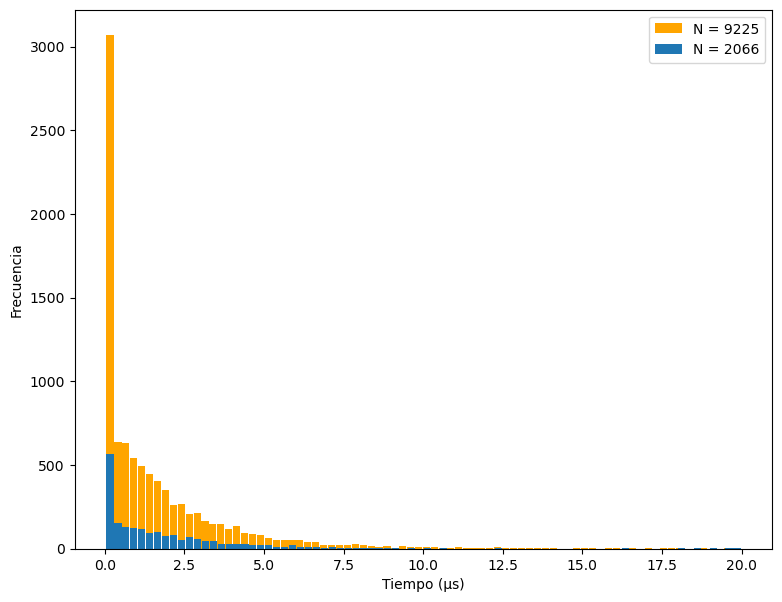

In [8]:
fig, ax = plt.subplots(1,1, figsize=(9,7))

ax.hist(times_rawdata2, bins=bins,label="N = 9225", color="orange", zorder=2, rwidth=0.9)
ax.hist(times_rawdata1, bins=bins,label="N = 2066", zorder=2, rwidth=0.9)
ax.set_xlabel("Tiempo (μs)")
ax.set_xlabel("Tiempo (μs)")

ax.set_ylabel("Frecuencia")
ax.set_ylabel("Frecuencia")
ax.legend()
ax.legend()


In [9]:
F1, N1 = np.histogram(times_rawdata1, bins=bins)

C:\Users\Acer\AppData\Local\Temp\ipykernel_20332\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


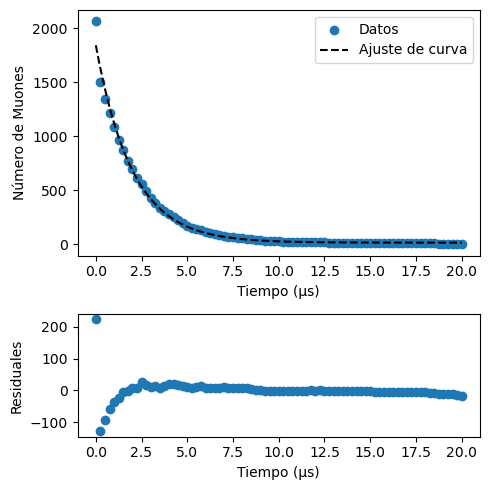

In [10]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit1 = np.linspace(0,20,bins+1)
time_graph1 = np.linspace(0,20,100)
muon_graph1 = np.array([len(times_rawdata1)]) 

for i in range(0, len(F1)):
    muon_graph1 = np.append(muon_graph1, muon_graph1[i] - F1[i])
    
params1, pcov1 = scipy.optimize.curve_fit(expfunction, time_fit1, muon_graph1)

residuals1 = muon_graph1 - expfunction(time_fit1,*params1)
    
ax[0].scatter(time_fit1,muon_graph1,label="Datos",marker="o")
ax[0].plot(time_graph1, expfunction(time_graph1,*params1),linestyle="--",label="Ajuste de curva",color="k")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de Muones")
ax[0].legend()

ax[1].scatter(time_fit1, residuals1, marker="o")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [11]:
F2, N2 = np.histogram(times_rawdata2, bins=bins)
F2,N2

(array([3067,  635,  633,  541,  496,  446,  403,  348,  264,  269,  209,
         215,  168,  145,  149,  119,  133,   91,   88,   81,   66,   52,
          51,   52,   53,   42,   41,   24,   23,   22,   24,   28,   20,
          18,   12,   15,    7,   15,   13,   13,   13,   11,    7,    4,
           9,    3,    5,    7,    2,    8,    3,    3,    5,    2,    5,
           2,    5,    1,    1,    2,    4,    3,    0,    4,    3,    1,
           2,    1,    2,    1,    2,    4,    2,    1,    0,    2,    0,
           0,    2,    2], dtype=int64),
 array([ 0.04  ,  0.2885,  0.537 ,  0.7855,  1.034 ,  1.2825,  1.531 ,
         1.7795,  2.028 ,  2.2765,  2.525 ,  2.7735,  3.022 ,  3.2705,
         3.519 ,  3.7675,  4.016 ,  4.2645,  4.513 ,  4.7615,  5.01  ,
         5.2585,  5.507 ,  5.7555,  6.004 ,  6.2525,  6.501 ,  6.7495,
         6.998 ,  7.2465,  7.495 ,  7.7435,  7.992 ,  8.2405,  8.489 ,
         8.7375,  8.986 ,  9.2345,  9.483 ,  9.7315,  9.98  , 10.2285,
        10.477 

C:\Users\Acer\AppData\Local\Temp\ipykernel_20332\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


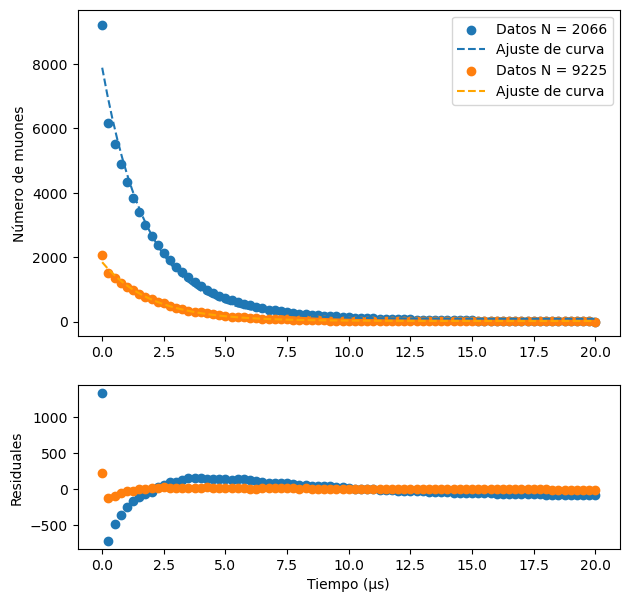

In [12]:
fig, ax = plt.subplots(2,1, figsize=(7,7),gridspec_kw={'height_ratios': [2, 1]})

time_fit2 = np.linspace(0,20,bins+1)
time_graph2 = np.linspace(0,20,100)
muon_graph2 = np.array([len(times_rawdata2)])

for i in range(0, len(F2)):
    muon_graph2 = np.append(muon_graph2, muon_graph2[i] - F2[i]) #remaining particles
    
params2, pcov2 = scipy.optimize.curve_fit(expfunction, time_fit2, muon_graph2)

residuals2 = muon_graph2 - expfunction(time_fit2,*params2)
    
ax[0].scatter(time_fit2,muon_graph2,label="Datos N = 2066",marker="o")
ax[0].plot(time_graph2, expfunction(time_graph2,*params2),linestyle="--",label="Ajuste de curva")
ax[0].set_ylabel("Número de muones")

ax[1].scatter(time_fit2, residuals2, marker="o")

ax[0].scatter(time_fit1,muon_graph1,label="Datos N = 9225",marker="o")
ax[0].plot(time_graph1, expfunction(time_graph1,*params1),linestyle="--",label="Ajuste de curva", color="orange")
ax[0].legend()

ax[1].scatter(time_fit1, residuals1, marker="o")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")

plt.show()

In [13]:
params2, np.sqrt(np.diag(pcov2))

(array([7.79753367e+03, 5.47693126e-01, 8.72719000e+01]),
 array([1.33344567e+02, 1.60168497e-02, 2.85060018e+01]))

In [14]:
1/5.47693126e-01, (1.60168497e-02)/(5.47693126e-01)**2

(1.825839968639665, 0.05339523716051573)

In [15]:
params22, pcov22 = scipy.optimize.curve_fit(expfunction2, time_fit2, muon_graph2)
params22, np.sqrt(np.diag(pcov22))

C:\Users\Acer\AppData\Local\Temp\ipykernel_20332\1277222602.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)
C:\Users\Acer\AppData\Local\Temp\ipykernel_20332\1277222602.py:5: RuntimeWarning: overflow encountered in multiply
  return A*np.exp(-x*B)


(array([7.79538417e+03, 5.21635593e-01]),
 array([1.37103597e+02, 1.38293569e-02]))

In [16]:
1/params22[1], (1.38293569e-02)/(5.21635593e-01)**2

(1.9170470970009608, 0.05082384882110349)

In [17]:
muon_graph2_corrected = muon_graph2 - params2[2]
params23, pcov23 = scipy.optimize.curve_fit(expfunction, time_fit2, muon_graph2_corrected)
params23, np.sqrt(np.diag(pcov23))

C:\Users\Acer\AppData\Local\Temp\ipykernel_20332\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C
C:\Users\Acer\AppData\Local\Temp\ipykernel_20332\1277222602.py:2: RuntimeWarning: overflow encountered in multiply
  return A*np.exp(-x*B)+C


(array([ 7.79755762e+03,  5.47693102e-01, -1.28513396e-02]),
 array([1.33352080e+02, 1.60138902e-02, 2.85025223e+01]))

In [23]:
cut=50

In [24]:
params24, pcov24 = scipy.optimize.curve_fit(linearfunction, time_fit2[:cut], np.log(muon_graph2[:cut]))
params24, np.sqrt(np.diag(pcov24))

(array([-0.37642825,  8.62042641]), array([0.0055941 , 0.03976582]))

In [26]:
1/0.3764

2.6567481402763016

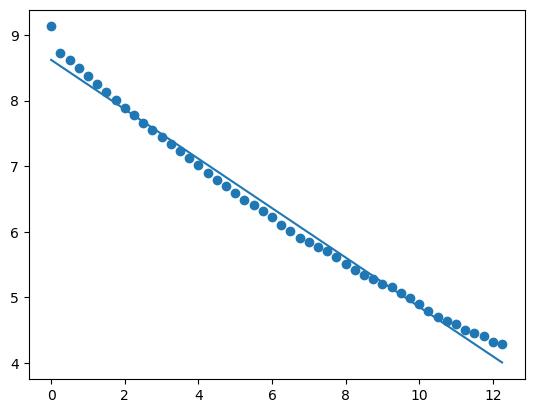

In [25]:
plt.scatter(time_fit2[:cut], np.log(muon_graph2[:cut]))
plt.plot(time_fit2[:cut], linearfunction(time_fit2[:cut],*params24))
plt.show()

In [27]:
params14, pcov14 = scipy.optimize.curve_fit(linearfunction, time_fit1[:-1], np.log(muon_graph1[:-1]))
params14, np.sqrt(np.diag(pcov14))

(array([-0.27280704,  6.66401292]), array([0.00829706, 0.09490755]))

In [20]:
1/(0.35371463)

2.8271377974951166

In [21]:
tau_obs = 1/5e-1
tau_obs

2.0

In [605]:
1e-2/(5e-1)**2

0.04

In [606]:
muon_graph1_corrected = muon_graph1 - params1[2]

In [607]:
muon_graph1_corrected[:14]

array([2049.20054624, 1483.20054624, 1327.20054624, 1195.20054624,
       1070.20054624,  950.20054624,  854.20054624,  755.20054624,
        677.20054624,  596.20054624,  545.20054624,  476.20054624,
        416.20054624,  369.20054624])

In [612]:
params12, pcov12 = scipy.optimize.curve_fit(expfunction, time_fit1, muon_graph1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


In [613]:
params12, np.sqrt(np.diag(pcov12))

(array([1.82640251e+03, 5.02638895e-01, 1.67994538e+01]),
 array([2.08170748e+01, 9.90039839e-03, 4.71788627e+00]))

In [614]:
1/4.84246873e-01, (8.70928466e-03)/(4.84246873e-01)**2

(2.0650623798658994, 0.037140593176136355)

In [567]:
0.009/(4.84e-01)**2

0.038419506864285226

In [568]:
rho,tau_plus,tau_minus = sym.symbols("rho,tau_plus,tau_minus",real=True)
tau_plus = 2.1969
tau_minus = 2.043
eq = sym.Eq(1.8258, (1+rho)*tau_minus*tau_plus/(rho*tau_minus + tau_plus))

In [569]:
sym.solve(eq,rho)

[-0.629376885245318]

In [570]:
hbarra = 6.582119569e-25 #GeV
m = 0.10566 #GeV

In [571]:
np.sqrt(192*np.pi**3*hbarra/(m**5*tau_obs*1e-6))

1.2197386717994762e-05

In [572]:
sigma_fermi = np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(tau_obs*1e-6)**3)/2
sigma_fermi

1.2197386717994762e-07

In [573]:
np.sqrt(192*np.pi**3*hbarra/(m**5*2.07*1e-6))

1.1989377051192723e-05

In [574]:
np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(2.07*1e-6)**3)/2

1.1583939179896353e-07

In [575]:
np.sqrt(192*np.pi**3*hbarra/(m**5*1.92*1e-6))

1.2448905689369976e-05

In [576]:
np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.05*1e-6) *np.sqrt(1/(1.92*1e-6)**3)/2

1.620951261636716e-07